# This is the notebook to validate information from the database system and the imaging datasets:
    1. Validate and report the information difference from: 
        1) Data collection download table ("<data collection>_<download date>.tsv"); 
        2) Metadata from imgaing download ("<data collection>_metadata.zip", these are the *.xml metadata file, the results will be saved out there); 
        3) Study data (which table???);
    2. Subject reports and filtering;
    3. create participant.csv
    4. Imaging session filtering.
## Objectives
    1. Validating session information;
    2. Get all avalible information for exploration;
## Other important information regarding PD
    1. Movement asessments;
    2. Cognitive assessments;
    3. Smell_Identification_Test;

In [1]:
from pathlib import Path
import pandas as pd

#PATH
tmp_dir  = Path("/scratch/0tmp") # For privacy, all the PPMI data are stored here locally.
main_dir = Path("/scratch/mr_proc/metadata") # The main GitRepo meta data dir

dl_tab_file = main_dir / "PPMI_all_7_18_2022.csv" # The info table accompanied the images download 
meta_dir = tmp_dir / "PPMI"                       # The unzipped meta data folder accompanied the images download 
metadata_file =  main_dir / "PPMI_all_7_18_2022_metadata.csv"    # The extracted meta data from the above folder. 
#
study_dir = tmp_dir / "study_data"           # The tabular files downloaded from the "Study data" cetegory. 
study_file = study_dir / "Magnetic_Resonance_Imaging__MRI_.csv" # The exact file with information of MRI images, No imaging ID specified

In [2]:
# Known T1 sequence descriptions,copied from heuristics.
T1W_SERIES = [
    'MPRAGE 2 ADNI',
    'MPRAGE ADNI',
    'MPRAGE GRAPPA 2',
    'MPRAGE GRAPPA2',
    'MPRAGE GRAPPA2(adni)',
    'MPRAGE w/ GRAPPA',
    'MPRAGE_GRAPPA',
    'MPRAGE_GRAPPA_ADNI',
    'MPRAGE GRAPPA',
    'SAG T1 3D MPRAGE',
    'sag mprage',
    'MPRAGEadni',
    'MPRAGE GRAPPA_ND',
    '3D SAG',
    'MPRAGE T1 SAG',
    'MPRAGE SAG',
    'SAG T1 3DMPRAGE',
    'SAG T1 MPRAGE',
    'SAG 3D T1',
    'SAG MPRAGE GRAPPA2-NEW2016',
    'SAG MPRAGE GRAPPA_ND',
    'Sag MPRAGE GRAPPA',
    'AXIAL T1 3D MPRAGE',
    'SAG MPRAGE GRAPPA',
    'sT1W_3D_FFE',
    'sT1W_3D_ISO',
    'sT1W_3D_TFE',
    'sag 3D FSPGR BRAVO straight',
    'SAG T1 3D FSPGR',
    'SAG FSPGR 3D '
    'SAG 3D FSPGR BRAVO STRAIGHT',
    'SAG T1 3D FSPGR 3RD REPEAT',
    'SAG FSPGR BRAVO',
    'SAG SPGR 3D',
    'SAG 3D SPGR',
    'FSPGR 3D SAG',
    'SAG FSPGR 3D',
    'SAG 3D FSPGR BRAVO STRAIGHT',
    'SAG FSPGR 3D ',
    't1_mpr_ns_sag_p2_iso',
    'T1',
    'T1 Repeat',
    'AX T1',
    'axial spgr',
    'T1W_3D_FFE AX',
    # added by Vincent
    'AX T1 SE C+',
    '3D SAG T1 MPRAGE',
    '3D SAG T1 MPRAGE_ND',
    '3D T1',
    '3D T1 MPRAGE',
    '3D T1-weighted',
    'Accelerated Sag IR-FSPGR',
    'MPRAGE',
    'MPRAGE - Sag',
    'MPRAGE Phantom GRAPPA2',
    'MPRAGE w/ GRAPPA 2',
    'PPMI_MPRAGE_GRAPPA2',
    'SAG 3D T1 FSPGR',
    'SAG FSPGR 3D VOLUMETRIC T1',
    'Sag MPRAGE GRAPPA_ND',
    'T1-weighted, 3D VOLUMETRIC',
    'tra_T1_MPRAGE',
    '3D T1-weighted_ND', ## added from livingpark
    '3D T1 _weighted',
    'Sagittal 3D Accelerated MPRAGE',
    'T1 REPEAT',
    'MPRAGE Repeat',
    'SAG_3D_MPRAGE'
]

## More info regarding column names in different tables:
    1. download table:
        Subject ID : "Subject"
        Image ID   : "Image Data ID" ("Ixxx")	
    
    2. metadata table:
        subject ID : "Subject"
        Image ID   : "Image Data ID" ("xxx")
 
    3. study data table:
        subject ID : "PATNO"
        Image ID   : "Nothing by now"

In [3]:
# Prerocessing of the downloading tab

ppmi_col_sel = ['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description']
# Read table
ppmi_dl_df  = pd.read_csv(dl_tab_file, sep=',')
print(ppmi_dl_df.shape)
ppmi_dl_df = ppmi_dl_df.loc[:, ppmi_col_sel]
ppmi_dl_df=ppmi_dl_df.sort_values(by="Subject").reset_index()

display(ppmi_dl_df.loc[:2,:])

# Prerocessing of the meta data info
ppmi_metadata_df = pd.read_csv(metadata_file, sep=',')
print(ppmi_metadata_df.shape)
ppmi_metadata_df = ppmi_metadata_df.loc[:, ppmi_col_sel]
ppmi_metadata_df.loc[:,'Image Data ID'] = ppmi_metadata_df.loc[:,'Image Data ID'].apply(lambda x: 'I'+str(x)) 
ppmi_metadata_df=ppmi_metadata_df.sort_values(by="Subject").reset_index()
display(ppmi_metadata_df.loc[:2,:])

# Prerocessing of the study data info
ppmi_study_df  = pd.read_csv(study_file, sep=',')
print(ppmi_study_df.shape)
display(ppmi_study_df.sort_values(by='PATNO').reset_index().loc[:2,:])

(9591, 12)


,index,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description
0,7050,I224561,3000,Control,F,69,1,MRI,AX T2 FLAIR
1,7049,I224562,3000,Control,F,69,1,MRI,sag 3D FSPGR BRAVO straight
2,7048,I224572,3001,PD,M,65,1,MRI,AX T2 FLAIR 5/1


(9591, 18)


,index,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description
0,2540,I224561,3000,Control,F,69.13,Baseline,MRI,AX T2 FLAIR
1,2541,I224562,3000,Control,F,69.13,Baseline,MRI,sag 3D FSPGR BRAVO straight
2,2543,I224572,3001,PD,M,65.14,Baseline,MRI,AX T2 FLAIR 5/1


(2725, 14)


,index,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MRICMPLT,MRIWDTI,MRIWRSS,MRIRSLT,MRIRSSDF,PDMEDDT,PDMEDTM,ORIG_ENTRY,LAST_UPDATE
0,0,272459801,3000,BL,MRI,02/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,02/2011,2020-06-25 16:02:19.0
1,1,720691201,3000,V12,MRI,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12/2018,2020-06-25 16:02:23.0
2,2,278750501,3001,BL,MRI,03/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,03/2011,2020-06-25 16:04:30.0


In [4]:
display(ppmi_dl_df.dtypes)
display(ppmi_metadata_df.dtypes)

index             int64
Image Data ID    object
Subject           int64
Group            object
Sex              object
Age               int64
Visit             int64
Modality         object
Description      object
dtype: object

index              int64
Image Data ID     object
Subject            int64
Group             object
Sex               object
Age              float64
Visit             object
Modality          object
Description       object
dtype: object

In [5]:
combined_df=ppmi_metadata_df.set_index('Image Data ID').join(ppmi_dl_df.set_index('Image Data ID'), on=["Image Data ID"], how="left", lsuffix='_meta', rsuffix='_dl')
#combined_df.loc[:,'comm_subj']=str(combined_df.loc[:,'Subject_meta'])+'-'+str(combined_df.loc[:,'Subject_dl'])
display(combined_df.loc)
for x in ['Subject', 'Group', 'Sex', 'Modality', 'Description']:
    print("Different "+x)
    display(combined_df[combined_df[x+'_meta']!=combined_df[x+'_dl']])




Different Subject


,index_meta,Subject_meta,Group_meta,Sex_meta,Age_meta,Visit_meta,Modality_meta,Description_meta,index_dl,Subject_dl,Group_dl,Sex_dl,Age_dl,Visit_dl,Modality_dl,Description_dl
Image Data ID,,,,,,,,,,,,,,,,


Different Group


,index_meta,Subject_meta,Group_meta,Sex_meta,Age_meta,Visit_meta,Modality_meta,Description_meta,index_dl,Subject_dl,Group_dl,Sex_dl,Age_dl,Visit_dl,Modality_dl,Description_dl
Image Data ID,,,,,,,,,,,,,,,,


Different Sex


,index_meta,Subject_meta,Group_meta,Sex_meta,Age_meta,Visit_meta,Modality_meta,Description_meta,index_dl,Subject_dl,Group_dl,Sex_dl,Age_dl,Visit_dl,Modality_dl,Description_dl
Image Data ID,,,,,,,,,,,,,,,,


Different Modality


,index_meta,Subject_meta,Group_meta,Sex_meta,Age_meta,Visit_meta,Modality_meta,Description_meta,index_dl,Subject_dl,Group_dl,Sex_dl,Age_dl,Visit_dl,Modality_dl,Description_dl
Image Data ID,,,,,,,,,,,,,,,,


Different Description


,index_meta,Subject_meta,Group_meta,Sex_meta,Age_meta,Visit_meta,Modality_meta,Description_meta,index_dl,Subject_dl,Group_dl,Sex_dl,Age_dl,Visit_dl,Modality_dl,Description_dl
Image Data ID,,,,,,,,,,,,,,,,


In [6]:
# All encodings in the imaging files
list_combine=[]
for a, b in zip(list(combined_df.loc[:,'Visit_meta']), list(combined_df.loc[:,'Visit_dl'])):
    list_combine.append(str(a)+'->'+ str(b))
print("All visits codings: ")
set(list_combine)

All visits codings: 


{'Baseline->1',
 'Month 12->5',
 'Month 24->7',
 'Month 36->9',
 'Month 48->11',
 'Premature Withdrawal->30',
 'Screening->0',
 'Symptomatic Therapy->21',
 'Unscheduled Visit 01->90',
 'Unscheduled Visit 02->91'}

## 1. Subject MRI imaging

In [2]:
# create the participants.csv from the data downloading tabel
ppmi_participant_csv_file  = data_dir / 'participants.csv'  # Inormation from download database.
participant_cols=['participant_id', 'age', 'sex', 'group']
participant_df=pd.DataFrame()
participant_df[participant_cols] = ppmi_dl_data[['Subject','Age','Sex', 'Group']]
participant_df=participant_df.drop_duplicates(subset='participant_id', keep='first')
participant_df.to_csv(ppmi_participant_csv_file, index=False)

## 2. subject demographics


## 3. Subject movement assessments

## 4. Subject cognitive assessments

In [3]:
print(ppmi_dl_data.columns)
ppmi_col_list=['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality', 'Description', 'Type', 'Acq Date', 'Format', 'Downloaded']

ppmi_dl_columns_list  = ['Subject','Image Data ID','Modality','Sex','Age', 'Visit','Description']
ppmi_dcm_columns_list = ['patient_id','dcm_dir_name','date','series_id', 'sequence_name','series_description', 'protocol_name','dim1','dim2','dim3','dim4']

def report_sum(df, _list, dataset_name):
    for x in _list:
        print("Total "+x+' of '+ dataset_name+" is : ")
        _len = len(df.loc[:,x].unique());
        display(_len)
        if _len <= 10:
            display(df.loc[:,x].unique())

# check download meta data and dcm information
report_list = ['Subject', 'Modality','Sex','Age', 'Visit',];
report_sum(ppmi_dl_data, report_list, 'PPMI')

Index(['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality',
       'Description'],
      dtype='object')
Total Subject of PPMI is : 


585

Total Modality of PPMI is : 


2

array(['MRI', 'DTI'], dtype=object)

Total Sex of PPMI is : 


3

array(['M', 'F', 'X'], dtype=object)

Total Age of PPMI is : 


52

Total Visit of PPMI is : 


10

array([ 7,  1,  5, 11, 90, 30,  9,  0, 21, 91])

Visit counts: 2    46
1    23
3    19
4     3
Name: Visit, dtype: int64
{Control}    91
Name: Group, dtype: int64


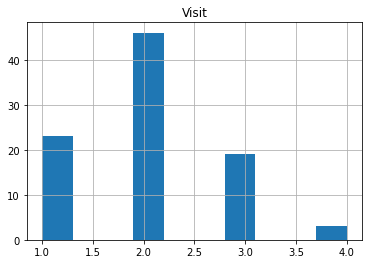

In [4]:
#data selection
tmp_data = ppmi_dl_data[ppmi_dl_data['Group']=='Control'].copy()

grouped=tmp_data.groupby(by='Subject').agg(lambda x: len(set(x)))
grouped.hist(column=['Visit'])
print('Visit counts:', grouped.Visit.value_counts())
print(tmp_data.groupby(by='Subject').agg(lambda x: set(x)).Group.value_counts())

Visit counts: 1    253
2    119
4    109
3    103
5      1
Name: Visit, dtype: int64
{PD}              304
{Prodromal}       145
{Control}          91
{SWEDD}            42
{Phantom}           2
{GenReg Unaff}      1
Name: Group, dtype: int64


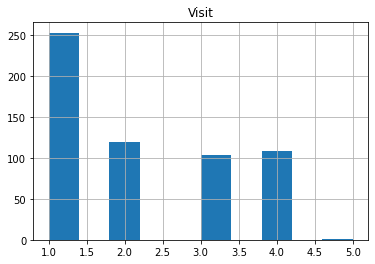

In [5]:
grouped=ppmi_dl_data.groupby(by='Subject').agg(lambda x: len(set(x)))
grouped.hist(column=['Visit'])
print('Visit counts:', grouped.Visit.value_counts())
print(ppmi_dl_data.groupby(by='Subject').agg(lambda x: set(x)).Group.value_counts())

In [6]:
ppmi_dl_data.groupby(by='Subject').agg(lambda x: list(x))

,Image Data ID,Group,Sex,Age,Visit,Modality,Description
Subject,,,,,,,
01218AUG16,"[I787959, I787960]","[Phantom, Phantom]","[X, X]","[56, 56]","[0, 0]","[MRI, DTI]","[MPRAGE Phantom GRAPPA2, DTI]"
08827APR11,"[I253669, I253662, I253664, I253666, I253668, ...","[Phantom, Phantom, Phantom, Phantom, Phantom, ...","[M, M, M, M, M, M, M, M]","[39, 39, 39, 39, 39, 39, 39, 39]","[1, 1, 1, 1, 1, 1, 1, 1]","[MRI, MRI, MRI, DTI, DTI, DTI, DTI, DTI]","[localizer, localizer, localizer, DTI_FA, DTI_..."
100005,"[I1526367, I1526369, I1526362, I1526371, I1526...","[PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, PD]","[M, M, M, M, M, M, M, M, M, M, M, M]","[53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[DTI, DTI, MRI, DTI, MRI, MRI, DTI, MRI, DTI, ...","[DTI_FA, DTI, 2D GRE-MT, DTI_30dir R-L, 2D GRE..."
100006,"[I1526387, I1526380, I1526382, I1526384, I1526...","[PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, PD, P...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F]","[56, 56, 56, 56, 56, 57, 56, 57, 56, 56, 56, 5...","[1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 5, 1, 5, 1]","[DTI, MRI, MRI, DTI, MRI, MRI, DTI, DTI, MRI, ...","[DTI_30dir R-L, 2D GRE-MT, 2D GRE-MT, DTI_ADC,..."
100007,"[I1525728, I1525730, I1537555, I1525732, I1525...","[PD, PD, PD, PD, PD, PD, PD, PD, PD]","[M, M, M, M, M, M, M, M, M]","[67, 67, 68, 67, 67, 67, 67, 68, 67]","[1, 1, 5, 1, 1, 1, 1, 5, 1]","[MRI, MRI, MRI, MRI, DTI, MRI, MRI, MRI, MRI]","[3D T2 FLAIR, 2D GRE-MT, 3D T2 FLAIR, 2D GRE-M..."
...,...,...,...,...,...,...,...
75512,"[I1199323, I1199326, I1199321, I1199324, I1199...","[Prodromal, Prodromal, Prodromal, Prodromal, P...","[F, F, F, F, F]","[51, 51, 51, 51, 51]","[1, 1, 1, 1, 1]","[MRI, DTI, MRI, MRI, DTI]","[MPRAGE_GRAPPA_ADNI, DTI_gated, AXIAL PD-T2 TS..."
75525,"[I1526084, I1526075, I1526079, I1526081, I1526...","[Prodromal, Prodromal, Prodromal, Prodromal, P...","[F, F, F, F, F, F, F, F, F]","[73, 73, 73, 73, 73, 73, 73, 73, 73]","[7, 7, 7, 7, 7, 7, 7, 7, 7]","[DTI, MRI, MRI, MRI, MRI, DTI, MRI, MRI, MRI]","[DTI_RL, 3D T2 FLAIR, 2D GRE-MT, 2D GRE-MT, 2D..."
75564,"[I1362245, I1362247, I1362244, I1362246, I1362...","[Prodromal, Prodromal, Prodromal, Prodromal, P...","[F, F, F, F, F]","[76, 76, 76, 76, 76]","[1, 1, 1, 1, 1]","[MRI, DTI, MRI, DTI, MRI]","[MPRAGE GRAPPA, DTI_gated, MPRAGE ADNI, DTI_ga..."


## Functional modules: 
    1. xml meta data extraction; 

In [4]:
# This cell should be skipped if the metadata has already been extracted.
metadata_out_path = main_dir / "PPMI_all_7_18_2022_metadata.csv"
over_write_file=1

import xml.etree.ElementTree as ET
files = [f for f in os.listdir(meta_dir) if f[-3:]=='xml']
tree = ET.parse(str(meta_dir/files[0]))
root = tree.getroot()
subject_info_list= [];
for file in files:
    tree = ET.parse(str(meta_dir/file))
    root = tree.getroot()
    data_dict={};
    # General info
    data_dict['Image Data ID']   =root[0][3][4][6][0].text
    data_dict['Subject']         =root[0][3][0].text
    data_dict['Group']           =root[0][3][1].text
    data_dict['Site']            =root[0][2].text
    data_dict['Sex']             =root[0][3][2].text
    data_dict['Visit']           =root[0][3][3][0].text
    data_dict['Age']             =root[0][3][4][1].text
    data_dict['weightKg']        =root[0][3][4][3].text
    # Imaging info
    data_dict['Description']     =root[0][3][4][6][1].text
    data_dict['Modality']        =root[0][3][4][5][1].text
    #data_dict['Field Strength']  =root[0][3][4][6][2][17].text # There are errors in metadata, the format is not consistent.
    data_dict['Weighting']       =root[0][3][4][6][2][1].text
    data_dict['Acquisition Type']=root[0][3][4][6][2][0].text
    data_dict['Acq Date']        =root[0][3][4][5][2].text
    data_dict['Matrix X']        =root[0][3][4][6][2][10].text
    data_dict['Matrix Y']        =root[0][3][4][6][2][11].text
    data_dict['Matrix Z']        =root[0][3][4][6][2][12].text
    data_dict['Slice Thickness'] =root[0][3][4][6][2][3].text
    # Study info
    data_dict['studyIdentifier'] =root[0][3][4][0].text
    subject_info_list.append(data_dict)
metadata_df=pd.DataFrame(subject_info_list)
if over_write_file==1: metadata_df.to_csv(metadata_out_path, index=False)